In [13]:
# Importing required Libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

C:\Users\nn\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [17]:
# To check and display the sum of null values 
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [18]:
#since the required field Price in table not available and its available with target so adding Proce column to data frame
bos['price']=boston.target

In [19]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


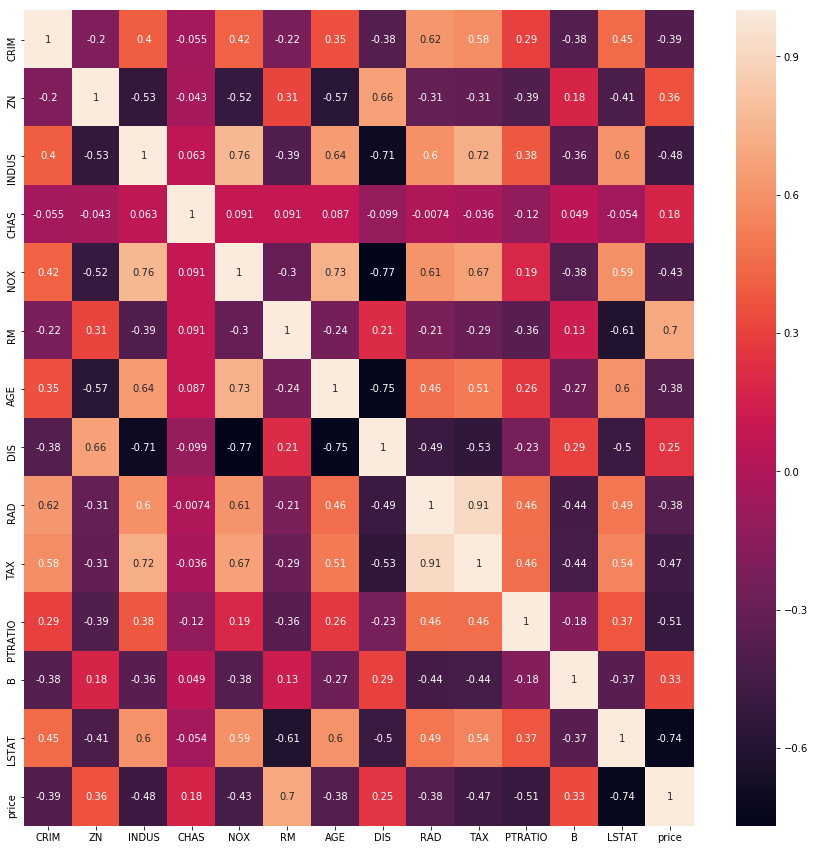

In [20]:
import seaborn as sns
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=bos.corr(), annot=True)

In [21]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

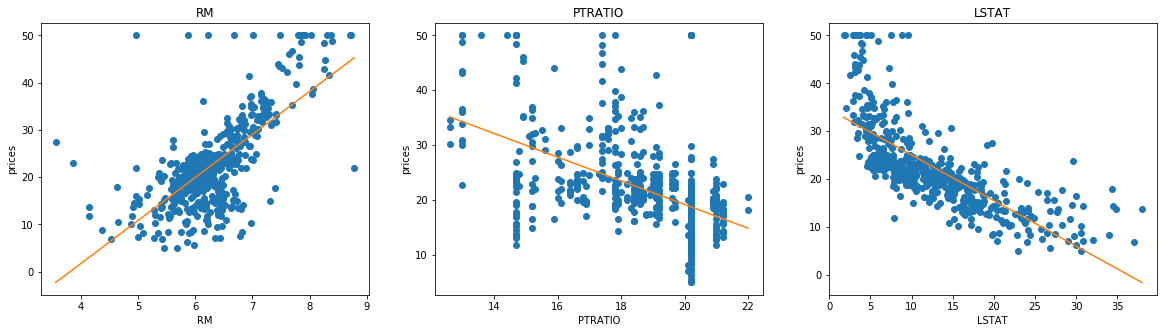

In [22]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['RM','PTRATIO','LSTAT']):
    plt.subplot(1, 3, i+1)
    x = bos[col]
    y = bos['price']
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')


In [23]:
# Creating different sizes of room based on their sizes using Quantile-based discretization function 

dd=pd.qcut(bos.RM,q=[0, .25, .5, .75, 1.])
pd.Categorical(dd)
dd=pd.get_dummies(dd,prefix='RM_')
dd=dd.rename(index=str, columns={"RM__(3.56, 5.885]":"Very_Small_room","RM__(5.885, 6.208]": "Small_room", "RM__(6.208, 6.624]": "Medium_room","RM__(6.624, 8.78]":"Large_room"})
bos.index=dd.index
bos['Very_Small_room']=dd['Very_Small_room']
bos['Small_room']=dd['Small_room']
bos['Medium_room']=dd['Medium_room']
bos['Large_room']=dd['Large_room']

In [24]:

# Creating different status using Quantile-based discretization function
dd=pd.qcut(bos.LSTAT,q=[0, .25, .5, .75, 1.])
pd.Categorical(dd)
dd=pd.get_dummies(dd,prefix='status_')
dd=dd.rename(index=str, columns={"status__(1.729, 6.95]":"Least_lower_Status","status__(6.95, 11.36]": "Medium_lower_Status", "status__(11.36, 16.955]": "lower_Status","status__(16.955, 37.97]":"Majorly_lower_Status"})
bos.index=dd.index
bos['Majorly_lower_Status']=dd['Majorly_lower_Status']
bos['lower_Status']=dd['lower_Status']
bos['Medium_lower_Status']=dd['Medium_lower_Status']
bos['Least_lower_Status']=dd['Least_lower_Status']

In [25]:
# Creating Independent(X) and Dependent(Target-Y) data frames
X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',  'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'Very_Small_room', 'Small_room',
       'Medium_room', 'Large_room','Majorly_lower_Status', 'lower_Status',
       'Medium_lower_Status', 'Least_lower_Status']]
Y = bos['price']

In [26]:

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.30,random_state=1234)
fit1 = linear_model.LinearRegression()

In [27]:

# Fitting and Printing the training scores 
fit1.fit(train_x,train_y)
print("Training scrore: {}".format(fit1.score(train_x,train_y)))
print("Test scrore: {}".format(fit1.score(test_x,test_y)))
r_squared=fit1.score(test_x,test_y)
r_squared_train=fit1.score(train_x,train_y)

Training scrore: 0.7244132688165013
Test scrore: 0.7427170191378303


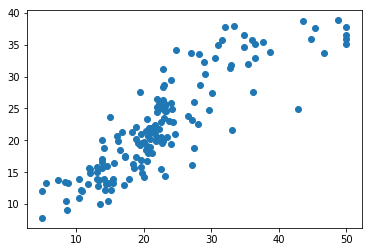

In [28]:

# Predicting the values using linear model and assigning to variable
pred_y = fit1.predict(test_x)
# Plotting the test values and prediction values
plt.scatter(test_y, pred_y)

In [29]:
# Displaying the co-efficient values of the fit
fit1.coef_

array([-1.41933804e-01,  6.00666180e-02, -1.56989802e-02,  2.71989323e+00,
       -2.28582959e+01,  2.05643139e-02, -1.72011024e+00,  3.78510262e-01,
       -1.24196433e-02, -9.82933351e-01,  1.01044016e-02, -5.15829482e-01,
       -1.00423226e+00, -1.32178241e+00,  2.84184415e+00, -6.33824186e+00,
       -1.43645952e+00,  1.73055022e+00,  6.04415116e+00])